#Task 1: Define the Problem

### Choose the best model to predict the price of a house or apartment in NYC based on this data set.

#Task 2a: Install the Needed Libraries

In [516]:
#Installed already, only need to import

#Task 2b: Import the Needed Libraries

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Task 3: Load the Data

In [518]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/nyc-rolling-sales.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [519]:
df.head()

# 22 Columns of data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


##Get Data Info

In [520]:
df.info()

# 84,548 rows of data
# Check datatypes. Borough, Land Square Feet, Gross Square Feet, Sale Price, Sale Date, and Zip Code need to be updated.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

##Find Missing Values

In [521]:
df.isna().sum()

# Shows no missing data.  However there are some dashes in the 'SALE PRICE' column that will need to be cleaned up.

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

#Task 5: Perform Data Cleaning

In [522]:
df = df.replace(' -  ', np.nan)
df = df.replace(' ', np.nan)

# Replace dashes and spaces with NaN so it's recognized as missing data.

In [523]:
df.head()

# Confirm df.replace

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [524]:
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['ZIP CODE'] = df['ZIP CODE'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

df.info()

# Reassigning datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  category      
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            83810 non-null  object        
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       0 non-null      float64       
 8   BUILDING CLASS AT PRESENT       83810 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                19052 non-null  object        
 11  ZI

In [525]:
df['SALE_MONTH'] = df['SALE DATE'].dt.month_name()
df['SALE_YEAR'] = df['SALE DATE'].dt.year

df.head()

df.info()

# Creating new columns to parse out sale month and sale year from sale date.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  category      
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            83810 non-null  object        
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       0 non-null      float64       
 8   BUILDING CLASS AT PRESENT       83810 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                19052 non-null  object        
 11  ZI

In [526]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_MONTH,SALE_YEAR
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,July,2017
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,December,2016
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,December,2016
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,September,2016
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,November,2016


In [527]:
df2 = df.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis = 1)

# Dropped columns that are not needed due to na data or have no meaning.

In [528]:
df2.isna().sum()

# Still some na data.

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
SALE_MONTH                            0
SALE_YEAR                             0
dtype: int64

In [529]:
df3 = df2.dropna()
df3.isna().sum()

# Dropped rows with na data.

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
SALE_MONTH                        0
SALE_YEAR                         0
dtype: int64

In [530]:
df3.info()

# Will cut more columns when performing regressions.

<class 'pandas.core.frame.DataFrame'>
Index: 47892 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         47892 non-null  category      
 1   NEIGHBORHOOD                    47892 non-null  object        
 2   BUILDING CLASS CATEGORY         47892 non-null  object        
 3   TAX CLASS AT PRESENT            47892 non-null  object        
 4   BLOCK                           47892 non-null  int64         
 5   LOT                             47892 non-null  int64         
 6   BUILDING CLASS AT PRESENT       47892 non-null  object        
 7   ADDRESS                         47892 non-null  object        
 8   ZIP CODE                        47892 non-null  category      
 9   RESIDENTIAL UNITS               47892 non-null  int64         
 10  COMMERCIAL UNITS                47892 non-null  int64         
 11  TOTAL U

In [531]:
df3.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_MONTH,SALE_YEAR
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,July,2017
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,September,2016
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,November,2016
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,September,2016
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,...,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,November,2016


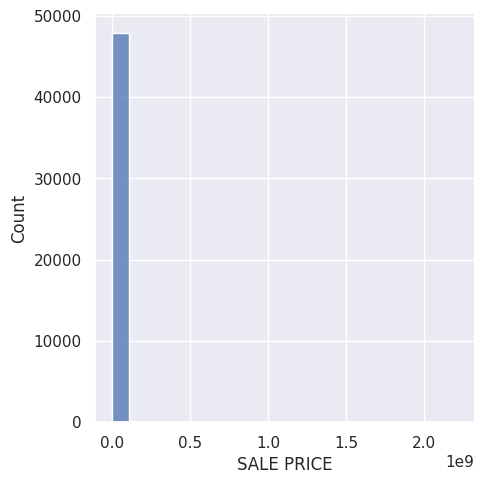

In [532]:
sns.displot(df3['SALE PRICE'], bins = 20)

# Why is there just one bar? Maybe there is a lot of outlier data.

<Axes: xlabel='BOROUGH', ylabel='SALE PRICE'>

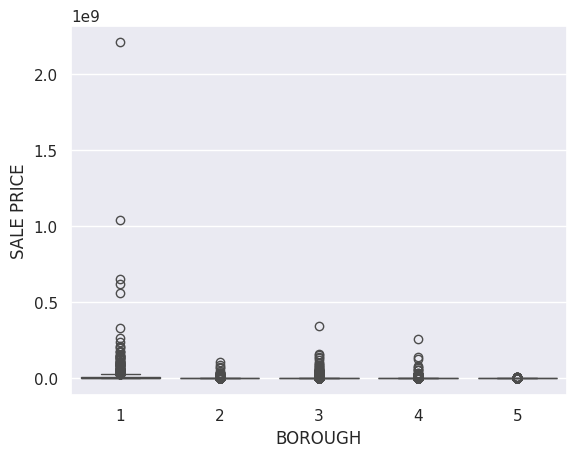

In [533]:
sns.boxplot(x = 'BOROUGH', y = 'SALE PRICE', data = df3)

# Shows that there is a lot of outlier data in Sale Price.

In [534]:
df3['SALE PRICE'].describe()

# Show distribution info of sale price.

count    4.789200e+04
mean     1.155607e+06
std      1.345022e+07
min      0.000000e+00
25%      8.056000e+04
50%      4.800000e+05
75%      8.296825e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [535]:
df4 = df3[(df3['SALE PRICE'] > 10000) & (df3['SALE PRICE'] < 5000000)]

# Removing outliers.
# This could also be done using percentiles and creating a lower and upper threshold.

In [536]:
removed = len(df3) - len(df4)
removed

# Removed 12,471 rows.

12471

In [537]:
df4['SALE PRICE'].describe()

count    3.542100e+04
mean     7.740681e+05
std      6.535872e+05
min      1.000100e+04
25%      4.000000e+05
50%      6.000000e+05
75%      9.150000e+05
max      4.975000e+06
Name: SALE PRICE, dtype: float64

In [538]:
df5 = df4[(df4['TOTAL UNITS']) < 50]

# Removing outliers from the commercial and residential units column by removing rows with more than 50 total units.

In [539]:
removed2 = len(df4) - len(df5)
removed2

# Removed only 42 rows with more than 100 units total.

42

#Task 6: Visualize Cleaned up Dataset

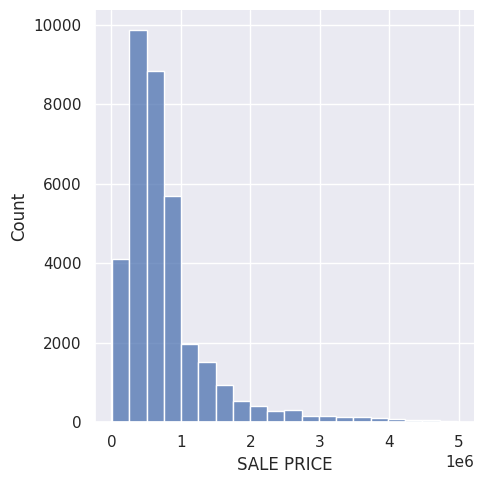

In [540]:
sns.displot(df5['SALE PRICE'], bins = 20)

# Visualization of the Sale Price distribution without outliers.
# Skewed right distribution.

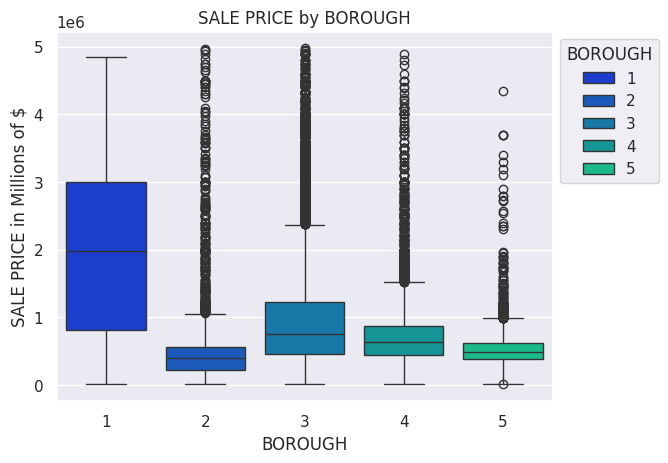

In [541]:
ax = sns.boxplot(x = 'BOROUGH', y = 'SALE PRICE', data = df5, hue = 'BOROUGH', palette = 'winter')
plt.title('SALE PRICE by BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE in Millions of $')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Visualization of the Sale Price distribution by BOROUGH.

Text(0, 0.5, 'SALE PRICE in Millions of $')

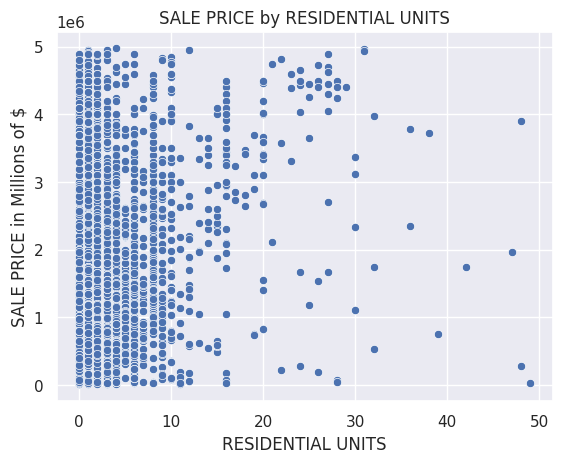

In [542]:
sns.scatterplot(x = 'RESIDENTIAL UNITS', y='SALE PRICE', data=df5)
plt.title('SALE PRICE by RESIDENTIAL UNITS')
plt.xlabel('RESIDENTIAL UNITS')
plt.ylabel('SALE PRICE in Millions of $')

# Visualization of the Sale Price distribution by RESIDENTIAL UNITS.

Text(0, 0.5, 'SALE PRICE in Millions of $')

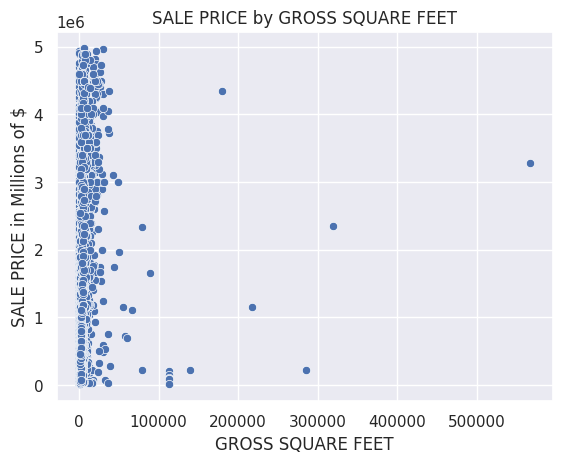

In [543]:
sns.scatterplot(x = 'GROSS SQUARE FEET', y='SALE PRICE', data=df5)
plt.title('SALE PRICE by GROSS SQUARE FEET')
plt.xlabel('GROSS SQUARE FEET')
plt.ylabel('SALE PRICE in Millions of $')

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [544]:
x = df5[['BOROUGH', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE_YEAR']].values
y = df5['SALE PRICE'].values

In [545]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

#Task 9: Choose the ML Method to follow

In [546]:
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
LinearRegressor_model = LinearRegression()

#Try the three models that might fit the data and target.

#Task 10: Train the ML Model

In [547]:
models = [DecisionTree_model, RandomForest_model, LinearRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

#Train all three models using for loop.

DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
LinearRegression() is trained!


#Task 11: Test the Model

In [548]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_LinearRegressor = LinearRegressor_model.score(x_test, y_test)

#Test models for accuracy using the x_test and y_test data.

In [549]:
models = {'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest, 'LinearRegressor_model': accuracy_LinearRegressor}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

#Print out the accuracy score for each model.

The accuracy score for the DecisionTree_model is 33.48%
The accuracy score for the RandomForest_model is 60.92%
The accuracy score for the LinearRegressor_model is 17.85%


#Task 12: Export the Model

###Exporting the Random Forest Model as it is the most accurate. This dataset has a lot of variables and most do not appear to have a linear relationship with price.  The Random Forest will handle interactions between different features better than the linear regression as refelcted in the accuracy score.  Linear regression is also more sensitive to outliers.  While many outliers were removed, there are still many hidden in the dataset.

In [550]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [551]:
pickle.dump(RandomForest_model, open('/content/drive/MyDrive/Colab Notebooks/Predictive Analytics Course/Projects/NYC Sales/NYCSalesModel.pkl', 'wb'))